In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#import mpld3
%matplotlib inline 
from USGS_functions import drop_constant_cols, fix_timezones, merge_scale_delete, outlier_std
from IPython.display import display, HTML
from pandas_summary import DataFrameSummary     # describe function extension
import itertools

%config InlineBackend.figure_format = 'png'

from ipywidgets import widgets

pd.options.mode.chained_assignment = None  # default='warn'

%load_ext autoreload
%autoreload 2

#mpld3.enable_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
df = pd.read_pickle('characteristics')
df.reset_index(inplace=True)
df = df[df.dateTime >= datetime(2016,1,1)]

['Sulfate [mg/l]' 'Temperature, water [deg C]']
1854
['Sulfate [mg/l]' 'Total suspended solids [mg/l]']
1309
['Sulfate [mg/l]' 'Turbidity [NTU]']
1824
['Sulfate [mg/l]' 'pH [None]']
1856
['Temperature, water [deg C]' 'Total suspended solids [mg/l]']
1426
['Temperature, water [deg C]' 'Turbidity [NTU]']
2735
['Temperature, water [deg C]' 'pH [None]']
3066
['Total suspended solids [mg/l]' 'Turbidity [NTU]']
1355
['Total suspended solids [mg/l]' 'pH [None]']
1427
['Turbidity [NTU]' 'pH [None]']
2827


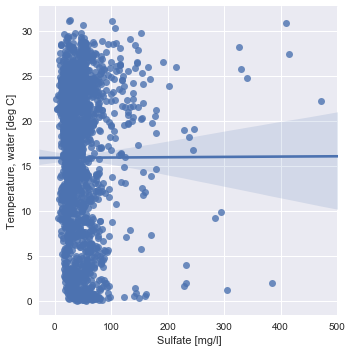

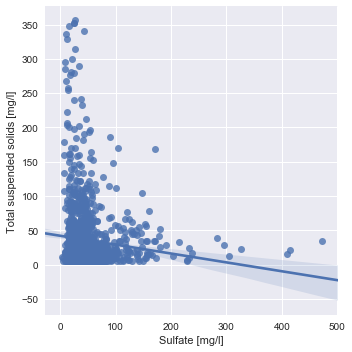

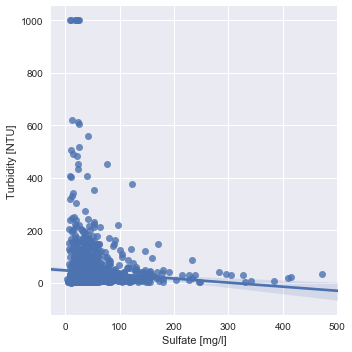

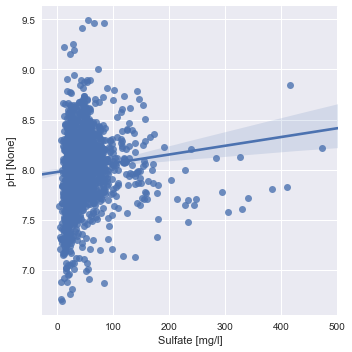

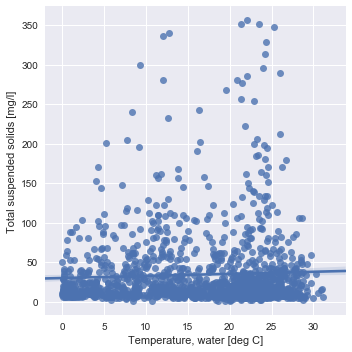

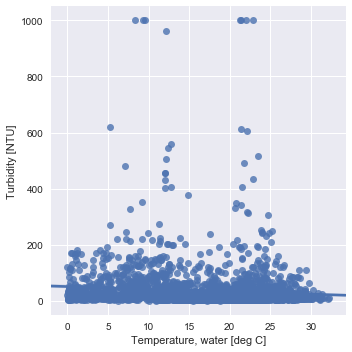

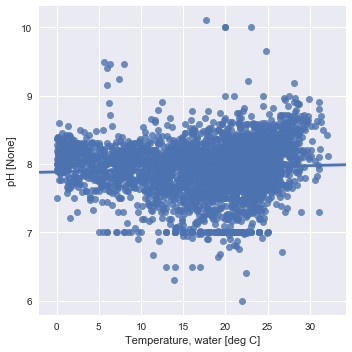

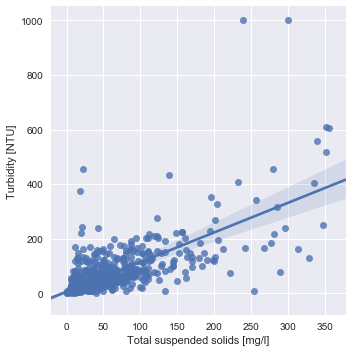

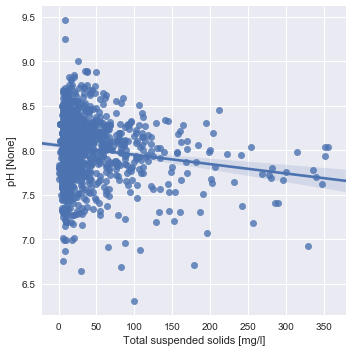

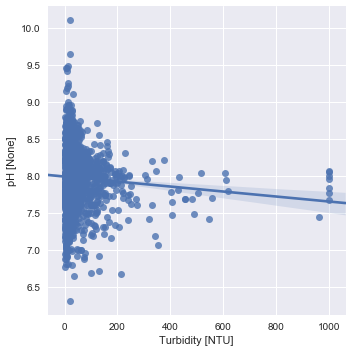

In [34]:
for (i,j) in itertools.combinations(range(2,len(df.columns)),2):
    if len(df.iloc[:,(i,j)].dropna()) > 1000:
        sns.lmplot(df.iloc[:,(i,j)].columns.values[0],df.iloc[:,(i,j)].columns.values[1], df)
        print(df.iloc[:,(i,j)].columns.values)
        print(len(df.iloc[:,(i,j)].dropna()))
        #sns.lmplot(i,j,dfCharacteristics)

## Pull out usable data
The following code finds the top four characteristics that have the most overlapping data points that can be compared.

In [64]:
n=0
iterations = list(itertools.combinations(range(2,len(df.columns)),4))
overlap = np.array(list(iterations),dtype=int)
overlap = np.append(overlap,np.zeros([len(overlap),1],dtype=int),axis=1)
for (i,j,k,u) in iterations:
    overlap[n,-1] = len(df.iloc[:,(i,j,k,u)].dropna())
    n = n+1
    #print(len(df.iloc[:,(i,j,k,u)].dropna()))

These top four columns are then used to creat a pair plot to look for correlation and visualize the data.

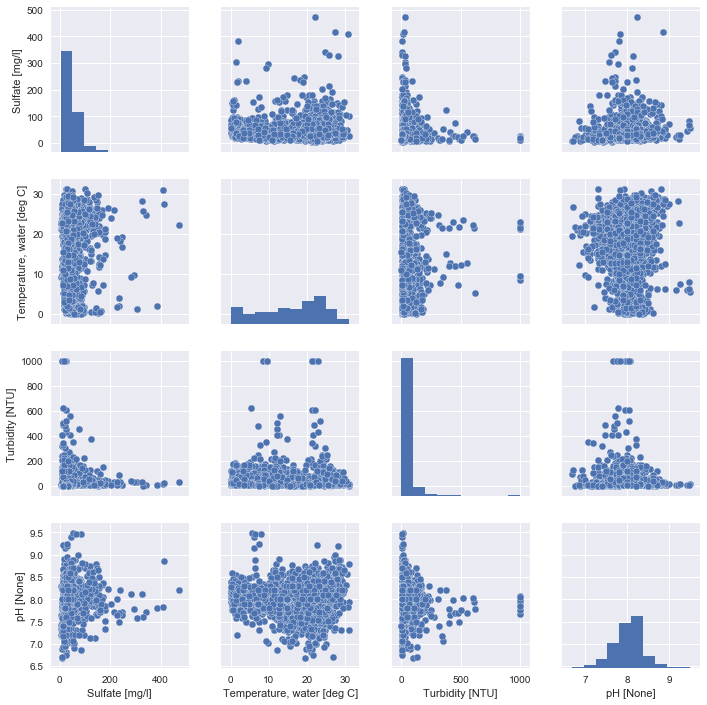

In [68]:
comparable = pd.DataFrame(overlap[overlap[:,4].argsort()[::-1]])
df1 = df.iloc[:,comparable.iloc[0,:-1].values]

sns.set()
df1 = df1.dropna(axis=0,how='any')
sns.pairplot(df1)
plt.savefig("corr.eps")
plt.savefig("corr.png", dpi=400)

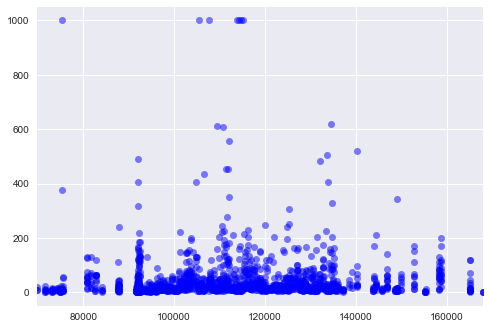

In [66]:
df1['Turbidity [NTU]'].plot(style='bo', alpha=.5)

## Plot relavent data

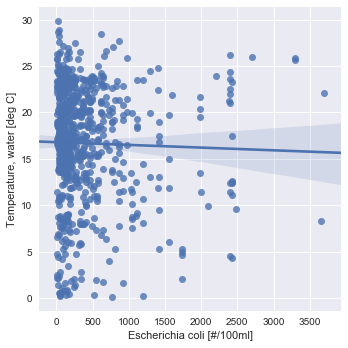

In [70]:
sns.lmplot('Escherichia coli [#/100ml]','Temperature, water [deg C]', df)
plt.savefig('temp_ecoli.eps')
plt.savefig('temp_ecoli.png', dpi=400)

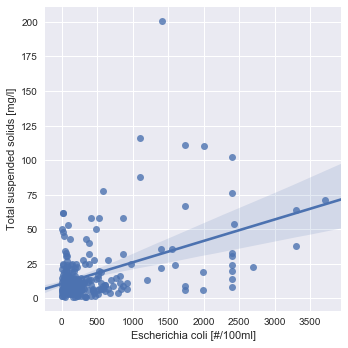

In [73]:
sns.lmplot('Escherichia coli [#/100ml]','Total suspended solids [mg/l]', df)
plt.savefig('tss_ecoli.eps')
plt.savefig('tss_ecoli.png', dpi=400)

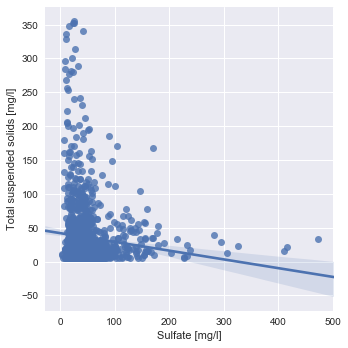

In [74]:
sns.lmplot('Sulfate [mg/l]','Total suspended solids [mg/l]', df)
plt.savefig('tss_sulfate.eps')
plt.savefig('tss_sulfate.png', dpi=400)